In [1]:
%run Tools.py
jupyter_settings()

#  确认观察时间窗口

In [2]:
sample_window = pd.read_csv('data/CreditSampleWindow.csv')
sample_window.shape

<IPython.core.display.Javascript object>

(1813157, 5)

- 数据处理

In [3]:
sample_window.sample(n=30)

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE
1770215,CID0061100,,M0,20161101.0,20161102.0
1790977,CID0348604,NaN,NaN,NaN,NaN
696600,CID0276857,,M0,20161201.0,20161203.0
1648341,CID0314691,,M0,20161201.0,20161202.0
326020,CID0068606,,M0,20160101.0,20160104.0
1593437,CID0221471,M0,M1,20180504.0,20180505.0
1746641,CID0189407,M0,M1,20170604.0,20170607.0
245290,CID0032174,,M0,20180101.0,20180104.0
1405659,CID0197073,M0,M1,20180104.0,20180108.0
1006918,CID0000317,M3,M4,20150730.0,20150829.0


In [4]:
sample_window['START_MONTH'] = sample_window.START_DATE//100
sample_window['CLOSE_MONTH'] = sample_window.CLOSE_DATE//100

In [5]:
sample_window.head()

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE,START_MONTH,CLOSE_MONTH
0,CID0128273,,M0,20170701.0,20170703.0,201707.0,201707.0
1,CID0214787,,M0,20180201.0,20180204.0,201802.0,201802.0
2,CID0287932,M4,M5,20180501.0,20180531.0,201805.0,201805.0
3,CID0351850,,M0,20161002.0,20161005.0,201610.0,201610.0
4,CID0217310,,M0,20150601.0,20150602.0,201506.0,201506.0


In [6]:
stage1= sample_window[['CID', 'STAGE_AFT', 'START_MONTH', 'CLOSE_MONTH']].copy()
stage1.head()

,CID,STAGE_AFT,START_MONTH,CLOSE_MONTH
0,CID0128273,M0,201707.0,201707.0
1,CID0214787,M0,201802.0,201802.0
2,CID0287932,M5,201805.0,201805.0
3,CID0351850,M0,201610.0,201610.0
4,CID0217310,M0,201506.0,201506.0


In [7]:
stage1.isnull().mean()

CID            0.000000
STAGE_AFT      0.082451
START_MONTH    0.082451
CLOSE_MONTH    0.082451
dtype: float64

In [8]:
stage1.duplicated().mean()

0.0021415685459119094

In [9]:
stage1.drop_duplicates(inplace=True)

In [10]:
stage1.duplicated().mean()

0.0

In [11]:
stage1_sort = stage1.sort_values(['CID', 'CLOSE_MONTH', 'STAGE_AFT'])

In [12]:
overdue = stage1_sort.drop_duplicates(subset=['CID', 'CLOSE_MONTH'], keep='last').copy()

In [13]:
overdue.tail(20)

,CID,STAGE_AFT,START_MONTH,CLOSE_MONTH
919294,CID0388253,M1,201802.0,201802.0
1714894,CID0388254,M0,201803.0,201803.0
53372,CID0388254,M0,201804.0,201804.0
1716830,CID0388255,M1,201703.0,201703.0
1653359,CID0388255,M0,201707.0,201707.0
1664229,CID0388256,M0,201509.0,201509.0
336053,CID0388256,M1,201701.0,201701.0
1471988,CID0388256,M1,201705.0,201705.0
315264,CID0388257,M0,201703.0,201703.0
391786,CID0388257,M0,201803.0,201803.0


In [14]:
overdue.dropna(inplace=True)

In [15]:
overdue.shape

(1278834, 4)

In [16]:
overdue.isnull().mean()

CID            0.0
STAGE_AFT      0.0
START_MONTH    0.0
CLOSE_MONTH    0.0
dtype: float64

In [17]:
overdue.STAGE_AFT.value_counts()

M0    750465
M1    357149
M2     38273
M3     27214
M4     20568
M6     20408
M5     19797
M7     18132
M8     14322
M9     12506
Name: STAGE_AFT, dtype: int64

In [18]:
overdue['FLAG'] = overdue.STAGE_AFT.map(lambda x: int(x[1:]))
overdue.head()

,CID,STAGE_AFT,START_MONTH,CLOSE_MONTH,FLAG
737967,CID0000000,M0,201601.0,201601.0,0
1102414,CID0000001,M0,201510.0,201510.0,0
296136,CID0000001,M0,201512.0,201512.0,0
315682,CID0000001,M0,201603.0,201603.0,0
293610,CID0000001,M1,201605.0,201605.0,1


In [19]:
import collections as cs

In [20]:
overdue2=overdue[['CID','CLOSE_MONTH','FLAG']]
overdue2.head()

,CID,CLOSE_MONTH,FLAG
737967,CID0000000,201601.0,0
1102414,CID0000001,201510.0,0
296136,CID0000001,201512.0,0
315682,CID0000001,201603.0,0
293610,CID0000001,201605.0,1


- 处理CLOSE_MONTH中0的值

In [55]:
overdue2.CLOSE_MONTH.value_counts()

201805.0    99270
201803.0    86651
201804.0    68748
201712.0    68363
201801.0    64448
201802.0    63831
201711.0    57048
201710.0    56234
201709.0    50912
201703.0    50070
201707.0    49192
201708.0    46842
201705.0    45512
201706.0    42357
201704.0    36960
201701.0    34325
201702.0    33183
201612.0    28657
201611.0    28158
201610.0    27977
201609.0    24364
201608.0    24029
201607.0    23837
201603.0    18742
201606.0    18597
201605.0    18155
201604.0    16340
201602.0    15365
201512.0    15169
201601.0    13860
201511.0    11608
201510.0    10354
201509.0     8312
201508.0     6415
201507.0     5906
201506.0     3847
201505.0     2764
201504.0     1481
201503.0      951
Name: CLOSE_MONTH, dtype: int64

In [56]:
overdue2.CLOSE_MONTH.max()

201805.0

In [57]:
overdue2.loc[overdue2.CLOSE_MONTH==0,'CLOSE_MONTH'] = 201805
overdue2

,CID,CLOSE_MONTH,FLAG
737967,CID0000000,201601.0,0
1102414,CID0000001,201510.0,0
296136,CID0000001,201512.0,0
315682,CID0000001,201603.0,0
293610,CID0000001,201605.0,1
...,...,...,...
1507017,CID0388258,201801.0,1
1167192,CID0388258,201802.0,1
371941,CID0388258,201803.0,1
414846,CID0388258,201804.0,1


In [58]:
overdue2.duplicated(subset=['CID', 'CLOSE_MONTH']).sum()

12509

In [59]:
overdue2_sort=overdue2.sort_values(by=['CID','CLOSE_MONTH','FLAG']).copy()
overdue2_sort.drop_duplicates(subset=['CID','CLOSE_MONTH'],keep='last',inplace=True)


In [60]:
overdue2_sort.duplicated(subset=['CID', 'CLOSE_MONTH']).sum()

0

In [61]:
overdue2_sort.shape

(1266325, 3)

-  构建转移矩阵
 - 行边上转移前的逾期状态
 - 列表示转移后的预期状态

In [62]:
overdue2_sort.head()

,CID,CLOSE_MONTH,FLAG
737967,CID0000000,201601.0,0
1102414,CID0000001,201510.0,0
296136,CID0000001,201512.0,0
315682,CID0000001,201603.0,0
293610,CID0000001,201605.0,1


In [63]:
overdue2_sort.set_index(keys=['CID', 'CLOSE_MONTH'])

FLAG
CID        CLOSE_MONTH      
CID0000000 201601.0        0
CID0000001 201510.0        0
           201512.0        0
           201603.0        0
           201605.0        1
...                      ...
CID0388258 201801.0        1
           201802.0        1
           201803.0        1
           201804.0        1
           201805.0        2

[1266325 rows x 1 columns]

In [64]:
overdue3=overdue2_sort.set_index(keys=['CID', 'CLOSE_MONTH']).unstack()

In [65]:
overdue3

FLAG                                                        \
CLOSE_MONTH 201503.0 201504.0 201505.0 201506.0 201507.0 201508.0 201509.0   
CID                                                                          
CID0000000       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
CID0000001       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
CID0000003       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
CID0000004       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
CID0000006       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...              ...      ...      ...      ...      ...      ...      ...   
CID0388254       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
CID0388255       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
CID0388256       NaN      NaN      NaN      NaN      NaN      NaN      0.0   
CID0388257       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
CID0388258       NaN      NaN      NaN      NaN      NaN      NaN      NaN   

                                        ...                             \
CLOSE_MONTH 201510.0 201511.0 201512.0  ... 201708.0 201709.0 201710.0   
CID                                     ...                              
CID0000000       NaN      NaN      NaN  ...      NaN      NaN      NaN   
CID0000001       0.0      NaN      0.0  ...      NaN      NaN      NaN   
CID0000003       NaN      NaN      NaN  ...      NaN      NaN      NaN   
CID0000004       0.0      NaN      0.0  ...      0.0      NaN      0.0   
CID0000006       NaN      NaN      NaN  ...      NaN      NaN      NaN   
...              ...      ...      ...  ...      ...      ...      ...   
CID0388254       NaN      NaN      NaN  ...      NaN      NaN      NaN   
CID0388255       NaN      NaN      NaN  ...      NaN      NaN      NaN   
CID0388256       NaN      NaN      NaN  ...      NaN      NaN      NaN   
CID0388257       NaN      NaN      NaN  ...      NaN      NaN      NaN   
CID0388258       NaN      NaN      NaN  ...      NaN      0.0      0.0   

                                                                            
CLOSE_MONTH 201711.0 201712.0 201801.0 201802.0 201803.0 201804.0 201805.0  
CID                                                                         
CID0000000       NaN      NaN      NaN      NaN      NaN      NaN      NaN  
CID0000001       NaN      NaN      NaN      NaN      NaN      NaN      NaN  
CID0000003       NaN      0.0      0.0      0.0      NaN      NaN      NaN  
CID0000004       NaN      1.0      0.0      0.0      0.0      0.0      NaN  
CID0000006       NaN      NaN      NaN      NaN      NaN      NaN      0.0  
...              ...      ...      ...      ...      ...      ...      ...  
CID0388254       NaN      NaN      NaN      NaN      0.0      0.0      NaN  
CID0388255       NaN      NaN      NaN      NaN      NaN      NaN      NaN  
CID0388256       NaN      NaN      NaN      NaN      NaN      NaN      NaN  
CID0388257       NaN      NaN      NaN      NaN      0.0      NaN      NaN  
CID0388258       0.0      1.0      1.0      1.0      1.0      1.0      2.0  

[242073 rows x 39 columns]

In [66]:
overdue3.columns = overdue3.columns.droplevel()

In [67]:
# overdue3.to_excel('overdue3.xlsx')

In [68]:
def gen_mat(df):
    mat = pd.DataFrame(data=np.zeros(shape=(10, 10)))
    counter = cs.Counter()
    for i, j in zip(overdue3.columns[:-1], overdue3.columns[1:]):
        data = df[[i, j]]
        #         display(data)
        data2 = data.dropna()
        data3 = [tuple(i) for i in data2.values]
        counter += cs.Counter(data3)
    for k, v in counter.items():
        mat.loc[k[0],k[1]] = v
    mat['all_count'] = mat.sum(axis=1)
    for i in mat.index:
        mat.loc[i,'bad_count'] = mat.iloc[i,i+1:10].sum()
    mat['to_bad'] = mat['bad_count'] / mat['all_count']
        
    return mat
mat = gen_mat(overdue3)
mat

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,all_count,bad_count,to_bad
0,220149.0,83779.0,9995.0,2101.0,8.0,0.0,0.0,2.0,2.0,2.0,316038.0,95889.0,0.303410
1,68099.0,170714.0,22327.0,604.0,6.0,10.0,0.0,6.0,2.0,6.0,261774.0,22961.0,0.087713
2,1619.0,3736.0,203.0,19676.0,4662.0,0.0,0.0,0.0,0.0,2.0,29898.0,24340.0,0.814101
3,543.0,1355.0,105.0,12.0,13760.0,919.0,1995.0,8.0,0.0,0.0,18697.0,16682.0,0.892229
4,3.0,12.0,1.0,0.0,0.0,15082.0,975.0,1.0,0.0,0.0,16074.0,16058.0,0.999005
5,0.0,4.0,0.0,0.0,0.0,0.0,15833.0,1576.0,2.0,8.0,17423.0,17419.0,0.999770
6,2.0,6.0,0.0,10.0,0.0,8.0,24.0,15379.0,155.0,0.0,15584.0,15534.0,0.996792
7,2.0,2.0,0.0,0.0,0.0,2.0,4.0,2.0,12475.0,148.0,12635.0,12623.0,0.999050
8,0.0,12.0,4.0,0.0,4.0,8.0,12.0,22.0,55.0,192.0,309.0,192.0,0.621359
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

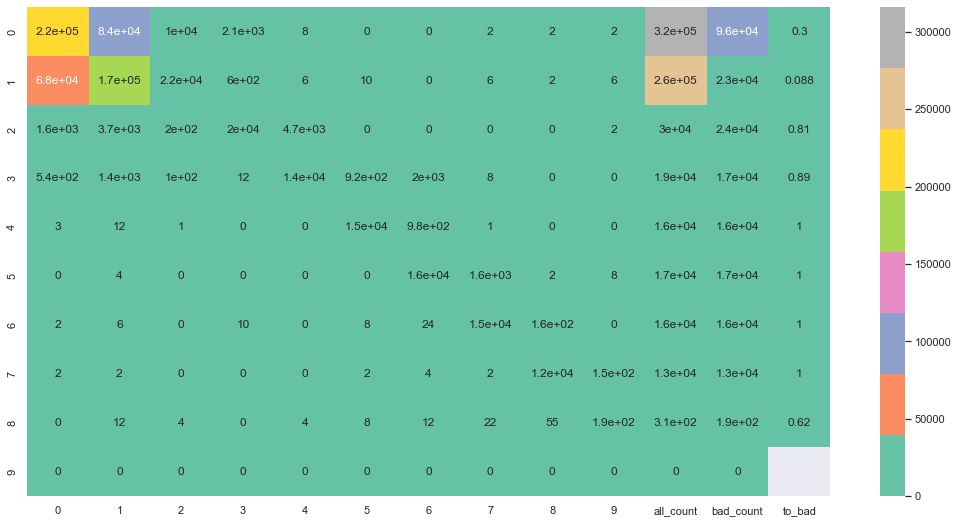

In [69]:
plt.figure(figsize=(18,9))
sns.heatmap(mat,cmap='Set2',annot=True)

- 结论：
-    从上面的数据分析中可以看出:
-     如果原来已经达到M0逾期，继续变坏的概率是30%
-     如果原来已经达到M1逾期，继续变坏的概率是8% 
-     如果原来已经达到M2逾期，继续变坏的概率是81%
-     如果原来已经达到M3逾期，继续变坏的概率是89%
-     如果原来已经达到M4逾期，继续变坏的概率是99%
-     如果原来已经达到M5逾期，继续变坏的概率是99%
-     如果原来已经达到M6逾期，继续变坏的概率是99%
-     如果原来已经达到M7逾期，继续变坏的概率是99%
-    M8和M9数据太少，不做统计

-  很明显，可以看出当用户逾期达到M2时，再继续逾期的概率非常大，
-              我们可以在用户达到M2之前进行催收等措施。
-              我们可以将用户达到M2逾期阶段后 将该用户定义为坏客户


-   我们的观察时间窗口（sample window）： M2，30天


-  其中：逾期阶段含义为：
-  M0: 逾期 0-3 天
-  M1: 逾期 3-30 天
-  M2: 逾期 30-60 天
-  M3: 逾期 60-90 天
-  以此类推 

# 确认表现时间窗口
- 研究用户办信用卡到逾期M2所需时间

In [70]:
first_use = pd.read_csv('data/CreditFirstUse.csv')
first_use.head()

<IPython.core.display.Javascript object>

,CID,FST_USE_DT
0,CID0092102,20161116
1,CID0111878,20161118
2,CID0264977,20161120
3,CID0059996,20160907
4,CID0057096,20160910


In [71]:
first_use['FST_USE_MONTH'] = first_use.FST_USE_DT // 100

In [72]:
first_use.head()

,CID,FST_USE_DT,FST_USE_MONTH
0,CID0092102,20161116,201611
1,CID0111878,20161118,201611
2,CID0264977,20161120,201611
3,CID0059996,20160907,201609
4,CID0057096,20160910,201609


In [73]:
overdue2.head()

,CID,CLOSE_MONTH,FLAG
737967,CID0000000,201601.0,0
1102414,CID0000001,201510.0,0
296136,CID0000001,201512.0,0
315682,CID0000001,201603.0,0
293610,CID0000001,201605.0,1


 - 需要把FLAG<2的数据去掉

In [74]:
overdue2_M2 = overdue2.loc[overdue2.FLAG>=2].copy()

In [75]:
display(overdue2.shape, overdue2_M2.shape)
overdue2_M2.head()

(1278834, 3)

(171220, 3)

,CID,CLOSE_MONTH,FLAG
341689,CID0000013,201805.0,9
588141,CID0000013,201603.0,3
936245,CID0000013,201604.0,4
914463,CID0000013,201605.0,5
775260,CID0000013,201606.0,6


In [76]:
overdue4 = overdue2_M2.sort_values(by=['CID', 'CLOSE_MONTH']).drop_duplicates(
    subset=['CID']).copy()
overdue4

,CID,CLOSE_MONTH,FLAG
588141,CID0000013,201603.0,3
517419,CID0000018,201805.0,3
957639,CID0000019,201710.0,2
1411127,CID0000043,201710.0,2
1043978,CID0000046,201610.0,2
...,...,...,...
972571,CID0388175,201707.0,2
1047794,CID0388199,201704.0,2
105236,CID0388239,201703.0,2
982139,CID0388249,201712.0,2


In [77]:
first_use.sort_values(by=['CID']).head()

,CID,FST_USE_DT,FST_USE_MONTH
41916,CID0000000,20151128,201511
272584,CID0000001,20150825,201508
348676,CID0000002,20170117,201701
119352,CID0000003,20170309,201703
370160,CID0000004,20150727,201507


 - 用merge内连接合并 并计算第一次使用到M2的时间间隔

In [78]:
M2_merge = overdue4.merge(first_use)
M2_merge2 = M2_merge[["CID","FST_USE_MONTH","CLOSE_MONTH"]].copy()
M2_merge2

,CID,FST_USE_MONTH,CLOSE_MONTH
0,CID0000013,201511,201603.0
1,CID0000018,201710,201805.0
2,CID0000019,201603,201710.0
3,CID0000043,201602,201710.0
4,CID0000046,201603,201610.0
...,...,...,...
33400,CID0388175,201611,201707.0
33401,CID0388199,201607,201704.0
33402,CID0388239,201609,201703.0
33403,CID0388249,201605,201712.0


In [79]:
import datetime as dt

In [80]:
dt_map = lambda x : dt.datetime(int(x//100),int(x%100),1)
M2_merge2["CLOSE_MONTH_DT"] = M2_merge2.CLOSE_MONTH.map(dt_map)
M2_merge2["FST_USE_MONTH_DT"] = M2_merge2.FST_USE_MONTH.map(dt_map)
M2_merge2

,CID,FST_USE_MONTH,CLOSE_MONTH,CLOSE_MONTH_DT,FST_USE_MONTH_DT
0,CID0000013,201511,201603.0,2016-03-01,2015-11-01
1,CID0000018,201710,201805.0,2018-05-01,2017-10-01
2,CID0000019,201603,201710.0,2017-10-01,2016-03-01
3,CID0000043,201602,201710.0,2017-10-01,2016-02-01
4,CID0000046,201603,201610.0,2016-10-01,2016-03-01
...,...,...,...,...,...
33400,CID0388175,201611,201707.0,2017-07-01,2016-11-01
33401,CID0388199,201607,201704.0,2017-04-01,2016-07-01
33402,CID0388239,201609,201703.0,2017-03-01,2016-09-01
33403,CID0388249,201605,201712.0,2017-12-01,2016-05-01


- 转化成datetime后可以直接相减
- 得到用户从第一次使用信用卡到逾期M2所需要的时间

In [81]:
M2_merge2["TimDelta"]=(M2_merge2.CLOSE_MONTH_DT - M2_merge2.FST_USE_MONTH_DT).dt.days // 30

In [82]:
M2_merge2

,CID,FST_USE_MONTH,CLOSE_MONTH,CLOSE_MONTH_DT,FST_USE_MONTH_DT,TimDelta
0,CID0000013,201511,201603.0,2016-03-01,2015-11-01,4
1,CID0000018,201710,201805.0,2018-05-01,2017-10-01,7
2,CID0000019,201603,201710.0,2017-10-01,2016-03-01,19
3,CID0000043,201602,201710.0,2017-10-01,2016-02-01,20
4,CID0000046,201603,201610.0,2016-10-01,2016-03-01,7
...,...,...,...,...,...,...
33400,CID0388175,201611,201707.0,2017-07-01,2016-11-01,8
33401,CID0388199,201607,201704.0,2017-04-01,2016-07-01,9
33402,CID0388239,201609,201703.0,2017-03-01,2016-09-01,6
33403,CID0388249,201605,201712.0,2017-12-01,2016-05-01,19


In [83]:
M2_merge2.TimDelta.value_counts()

 9     2151
 10    2050
 11    2041
 8     1918
 12    1860
 13    1808
 7     1658
 14    1556
 16    1422
 15    1415
 17    1400
 18    1241
 6     1237
 19    1078
 20    1061
 21    1022
 5      866
 22     782
 23     734
 4      675
 24     604
 25     537
 26     465
 27     445
 29     402
 28     396
 3      337
 31     328
 30     324
 32     252
 33     250
 34     241
 36     210
 35     204
 37     195
 38     164
 2       48
 39      25
-20       1
 40       1
 1        1
Name: TimDelta, dtype: int64

- 过滤复数异常值

In [84]:
M2_merge3 = M2_merge2.loc[M2_merge2.TimDelta > 0].copy()
M2_merge3.TimDelta.value_counts()

9     2151
10    2050
11    2041
8     1918
12    1860
13    1808
7     1658
14    1556
16    1422
15    1415
17    1400
18    1241
6     1237
19    1078
20    1061
21    1022
5      866
22     782
23     734
4      675
24     604
25     537
26     465
27     445
29     402
28     396
3      337
31     328
30     324
32     252
33     250
34     241
36     210
35     204
37     195
38     164
2       48
39      25
40       1
1        1
Name: TimDelta, dtype: int64

- 可视化

<AxesSubplot:>

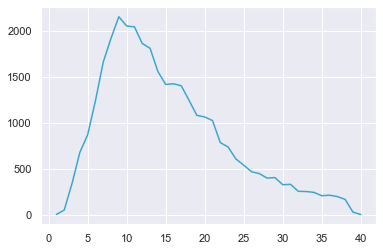

In [85]:
M2_merge3.TimDelta.value_counts().sort_index().plot()

<IPython.core.display.Javascript object>

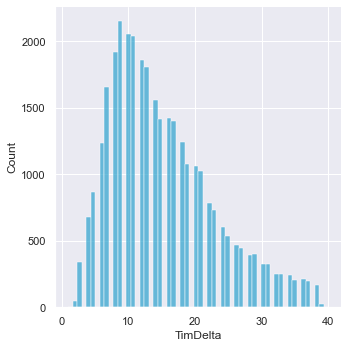

In [86]:
sns.displot(M2_merge3.TimDelta)


 - 很明显大致集中在9个到15个月
- 结论： 用户从开始使用信用卡到第一次达到违约（M2逾期）大部分用户需要花15个月左右的时间，这15个月我们可以看作是表现时间窗口
- 正负样本定义实例：如果通过分析判断观察时间窗口为M2 ，表现时间窗口为 15个月，那么则定义首15个月内有M2及以上逾期，即逾期天数 >=31 天的样本为负样本，逾期天数 <3天(M0逾期或没有逾期)的样本为正样本，中间状态的样本（M1逾期）做不确定处理不进入模型